In [2]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sb

Machine learning is one of the few fields that are developing an at explosive rate. There are countless applications of this field, from prediction to inference. 
Our Group: Team A will be answering a simple question: Can we use machine learning to infer and predict on whether a customer will commit or cancel their bookings. 
Hotels lose a lot of money when a customer cancels their bookings, and so we thought that we could use machine learning to predict and infer what factors influence customer's decision to commit or cancel.
Perhaps we could use our machine learning model to suggest policies hotel chains could use to minimize the revenue lost form a cancelled booking. 

When we first extracted the dataset, we noticed that there were a vast collection of problems with the dataset. The first issue we found was that there were a total of 18 predictors in the dataset; many of which shared no correlation with the response. To build off the response, we also discovered that, expectedly, the response was purely binary; either a yes or a no, which meant that it would be not be adequate to use a simple linear regression model to regress against the response.
Furthermore, upon closer inspection of the dataset description, we had noticed that some of the varibles had an insufficient context of explanation. 
Due to these condition, our first research questions was simple: What variables are revelant to our response: booking_status. Before we even thought of making a model, our first task was to do feature selection. 

Feature Selection:
We spent a good portion of our time looking at each variable and running many plots and tests to see if they were related to the response in any way. 
We found many interesting results. 


In [3]:
df = pd.read_csv("Hotel_Reservations_finalclean.txt")
df_raw = pd.read_csv("Hotel Reservations.csv")
df["long_trip"] = (df["weekend_nights_no"] + df["weekday_nights_no"]) > 2
df_interest = df.filter(["lead_time", "avg_price_per_room", "special_requests_no", "month", "prev_show_rate", "long_trip" ,"canceled"])
df_interest

,lead_time,avg_price_per_room,special_requests_no,month,prev_show_rate,long_trip,canceled
0,224,65.00,0,10.0,0.5,True,0
1,5,106.68,1,11.0,0.5,True,0
2,1,60.00,0,2.0,0.5,True,1
3,211,100.00,0,5.0,0.5,False,1
4,48,94.50,0,4.0,0.5,False,1
...,...,...,...,...,...,...,...
36270,85,167.80,1,8.0,0.5,True,0
36271,228,90.95,2,10.0,0.5,True,1
36272,148,98.39,2,7.0,0.5,True,0
36273,63,94.50,0,4.0,0.5,True,1


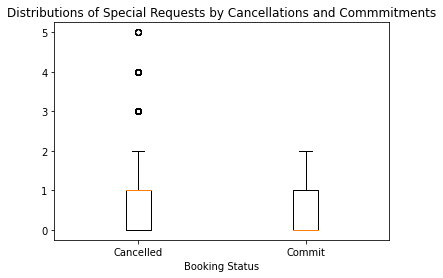

In [4]:
##The Special Request Variable
df_interest_canceled = df[df["canceled"] == 0]
df_interest_commited = df[df["canceled"] == 1]
import matplotlib.pyplot as plt
labels = ['Cancelled', 'Commit']
plt.boxplot([df_interest_canceled["special_requests_no"], df_interest_commited["special_requests_no"]], labels=labels)
#plt.ylim(0, 2)  # set the y-axis limits
#plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5', '1.75', '2'])
 
plt.xlabel("Booking Status")

plt.title("Distributions of Special Requests by Cancellations and Commmitments")
plt.show()

Here, we can see that there is a noticable difference between the mean special requests between the customers who cancel and dont cancel. Furthermore, almost all of the outliers are the customers who cancel. Moreover, we can see that in general, customers never really make special_requests, but the ones who do are likely the ones who are most likely to cancel. 
One possible inference is that Customers who tend to ask for special requests are more likely to be picky and hence cancel at a moments notice

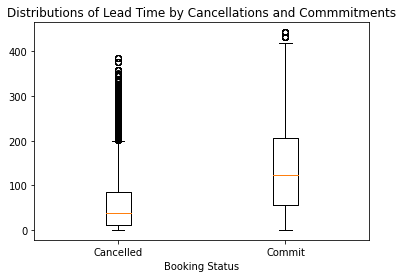

In [5]:
#lead time
labels = ['Cancelled', 'Commit']
plt.boxplot([df_interest_canceled["lead_time"], df_interest_commited["lead_time"]], labels=labels)
#plt.ylim(0, 2)  # set the y-axis limits
#plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5', '1.75', '2'])
 
plt.xlabel("Booking Status")

plt.title("Distributions of Lead Time by Cancellations and Commmitments")
plt.show()

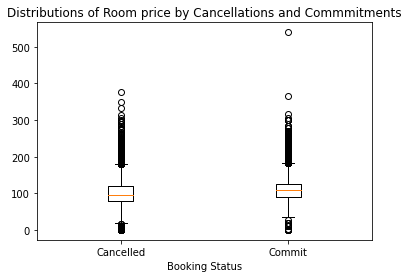

In [6]:
labels = ['Cancelled', 'Commit']
plt.boxplot([df_interest_canceled["avg_price_per_room"], df_interest_commited["avg_price_per_room"]], labels=labels)
#plt.ylim(0, 2)  # set the y-axis limits
#plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['0', '0.25', '0.5', '0.75', '1', '1.25', '1.5', '1.75', '2'])
 
plt.xlabel("Booking Status")

plt.title("Distributions of Room price by Cancellations and Commmitments")
plt.show()

I need to justify this somehow. 

<AxesSubplot:xlabel='canceled'>

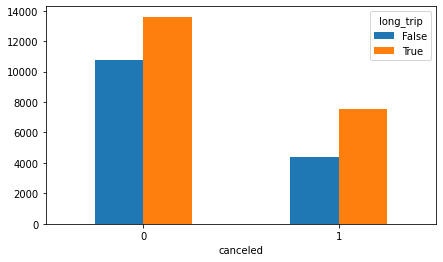

In [7]:
figure = pd.crosstab(index = df_interest["canceled"], columns= df_interest["long_trip"])
figure.plot.bar(figsize = (7,4), rot = 0)

<AxesSubplot:xlabel='canceled', ylabel='prev_show_rate'>

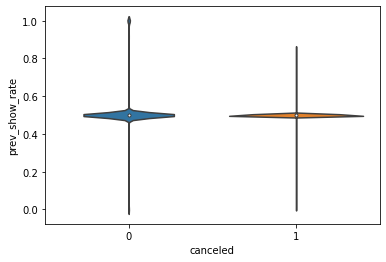

In [8]:
sb.violinplot(data = df_interest, x = "canceled", y = "prev_show_rate")

I need to justify this somehow

month     1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
canceled                                                                     
0          990  1244  1658  1741  1650  1912  1606  2325  3073  3437  2105   
1           24   423   700   995   948  1291  1314  1488  1538  1880   875   

month     12.0  
canceled        
0         2619  
1          402  
11878
24360


<AxesSubplot:xlabel='canceled'>

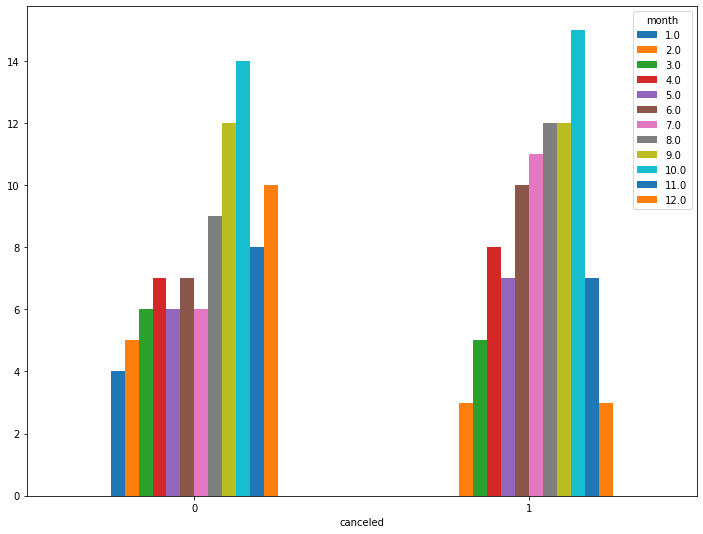

In [47]:
figure2 = pd.crosstab(index = df_interest["canceled"], columns  = df_interest["month"])
canceled_total = 0
commited_total = 0
for i in range(1,13):
    canceled_total += figure2[i][1]
    commited_total += figure2[i][0]
print(figure2)
print(canceled_total)
print(commited_total)
for i in range(1,13):
    figure2[i][1] = 100 * figure2[i][1]/canceled_total
    figure2[i][0] = 100 * figure2[i][0]/commited_total


figure2.plot.bar(figsize = (12,9), rot = 1, legend=("Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"))

As seen in the figure, the time of year has a great infuence on whether a person will cancel their booking or not. One of the most oddest features in the dataset is that cancellations are nearly non-existent in the month of january. A similar result can be seen in the month of December. This could be due to the existence of the holiday season, as prices surge during that time and does not make sense for one to cancel their reservations. However, soon after janurary, the frequency of cancellations increase and this trend remains the same up until November; at which point it goes down by a fair margin.
We can make a simple conclusion from this data, which is that customers are less likely to cancel their reservations during the holiday seasons. 

In [48]:
df_interest

,lead_time,avg_price_per_room,special_requests_no,month,prev_show_rate,long_trip,canceled
0,224,65.00,0,10.0,0.5,True,0
1,5,106.68,1,11.0,0.5,True,0
2,1,60.00,0,2.0,0.5,True,1
3,211,100.00,0,5.0,0.5,False,1
4,48,94.50,0,4.0,0.5,False,1
...,...,...,...,...,...,...,...
36270,85,167.80,1,8.0,0.5,True,0
36271,228,90.95,2,10.0,0.5,True,1
36272,148,98.39,2,7.0,0.5,True,0
36273,63,94.50,0,4.0,0.5,True,1
